## $\color{green}{\text{GMD Figure 2}}$

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import netCDF4 as nc
from pandas.plotting import table 
import xarray as xr

#### $\color{blue}{\text{Use Module data from Bob's run on Amarel}}$

In [2]:
# Load FACTS module names/data as a dataframe.
df = pd.read_fwf('001_IP_names_Modules_Data/mod-submod-data_Bob_amarel_4_Fig2.txt')
df

,Component,Module,sub_Module,Data_File
0,Glaciers,ipccar5,glaciers,ar5glaciers.ipccar5.glaciers_globalsl.nc
1,Glaciers,emulandice,glaciers,emuglaciers.emulandice.glaciers_globalsl.nc
2,GrIS,FittedISMIP,GrIS,GrIS1f.FittedISMIP.GrIS_GIS_globalsl.nc
3,GrIS,emulandice,GrIS,emuGrIS.emulandice.GrIS_globalsl.nc
4,AIS,ipccar5,icesheets,ar5AIS.ipccar5.icesheets_AIS_globalsl.nc
5,AIS,emulandice,AIS,emuAIS.emulandice.AIS_globalsl.nc
6,AIS,larmip,AIS,larmip.larmip.AIS_globalsl.nc
7,TE,tlm,oceandynamics,ocean.tlm.oceandynamics_globalsl.nc


#### $\color{blue}{\text{Extract .nc data \& Find Percentiles}}$

In [3]:
modNO       = df.index.values;   # Number of datasets Module outputs
SCENARIO    = ['ssp585'];        # SCENARIO    = ['ssp126', 'ssp245', 'ssp585'];  
#
# Temp DF to store all .nc O/P.      
df_TEMP      = []
#        
for val in modNO:
    for scenario in SCENARIO: 
        MODULE = df.loc[val].at['Module'];     SUB_MODULE = df.loc[val].at['sub_Module']; COMP = df["Component"][val]
        # Skip if data is absent.
        if df.loc[val].at['Data_File'] == 'XXX':
           continue 
        # Pick the data files. 
        if scenario == 'ssp585':
            dataFOLDER = '/projects/kopp/facts-experiments/coupling.{arg1}.localhost/output/'.format(arg1=scenario)
            dataFILE   = 'coupling.{arg1}.localhost.'.format(arg1=scenario) + df.loc[val].at['Data_File']
        else:
            dataFOLDER = '/projects/kopp/facts-experiments/coupling.{arg1}/output/'.format(arg1=scenario)
            dataFILE   = 'coupling.{arg1}.'.format(arg1=scenario) + df.loc[val].at['Data_File']
            #
        dataPATH = dataFOLDER + dataFILE
        # IMPORT .nc data.
        d_nc = xr.open_dataset(dataPATH)
        #
        #
        # Percentile calculation.
        percentList = [50, 5, 17, 83, 95]
        #
        for yy in d_nc["years"].values:
            # Find year index to pick SLC value
            Yind    = np.where(d_nc["years"].values == yy)[0][0]
            if SUB_MODULE == 'temperature':
                GMSL = d_nc["surface_temperature"][:,Yind,0].values
            else:
                GMSL = d_nc["sea_level_change"][:,Yind,0].values
            #
            # Find Percentile ranges.
            pcntle = np.percentile(GMSL[:], percentList );    pcntle = np.around(pcntle,2)
            #
            TEMP = [COMP,MODULE,SUB_MODULE, scenario, yy, ] + pcntle.tolist()
            df_TEMP.append( TEMP )
df_ptile = pd.DataFrame( df_TEMP, columns=['Component','Module','sub_Module', 'SSP', 'Year', ] + [ f'col_{x}' for xi, x in enumerate( percentList )] )
df_ptile

,Component,Module,sub_Module,SSP,Year,col_50,col_5,col_17,col_83,col_95
0,Glaciers,ipccar5,glaciers,ssp585,2020,20.0,8.00,13.0,25.00,28.00
1,Glaciers,ipccar5,glaciers,ssp585,2030,30.0,10.00,20.0,39.00,44.00
2,Glaciers,ipccar5,glaciers,ssp585,2040,41.0,17.00,29.0,55.00,62.00
3,Glaciers,ipccar5,glaciers,ssp585,2050,55.0,25.00,39.0,74.00,83.00
4,Glaciers,ipccar5,glaciers,ssp585,2060,71.0,36.95,52.0,96.00,109.00
...,...,...,...,...,...,...,...,...,...,...
67,TE,tlm,oceandynamics,ssp585,2060,126.0,93.00,106.0,150.00,172.05
68,TE,tlm,oceandynamics,ssp585,2070,162.0,119.95,136.0,193.00,225.00
69,TE,tlm,oceandynamics,ssp585,2080,202.5,148.00,169.0,242.00,283.05
70,TE,tlm,oceandynamics,ssp585,2090,246.5,179.00,204.0,296.00,345.05


## Plot: GMSL contribution from Icesheets, Glaciers and TE

#### Global Def

In [4]:
# Colors updated to match updated SPM colors
color_GrIS      = np.array([0, 173,207])/255
color_AIS       = np.array([23  ,60 ,  102])/255
color_Glaciers  = np.array([247 ,148,  32])/255
color_TE        = np.array([231 ,29 ,  37])/255
color_ssp585    = np.array([149 ,27 ,  30])/255
#
# Workflow Components.
wf1e = ['GrIS-emulandice', 'AIS-emulandice', 'Glaciers-emulandice', 'TE-tlm']
wf1f = ['GrIS-FittedISMIP', 'AIS-ipccar5', 'Glaciers-ipccar5-GMIP2', 'TE-tlm']
wf2e = ['GrIS-emulandice', 'AIS-larmip', 'Glaciers-emulandice','TE-tlm']
wf2f = ['GrIS-FittedISMIP', 'AIS-larmip', 'Glaciers-ipccar5-GMIP2','TE-tlm']
WORKFLO = ["wf1e","wf1f","wf2e","wf2f"]

### Plot figure 

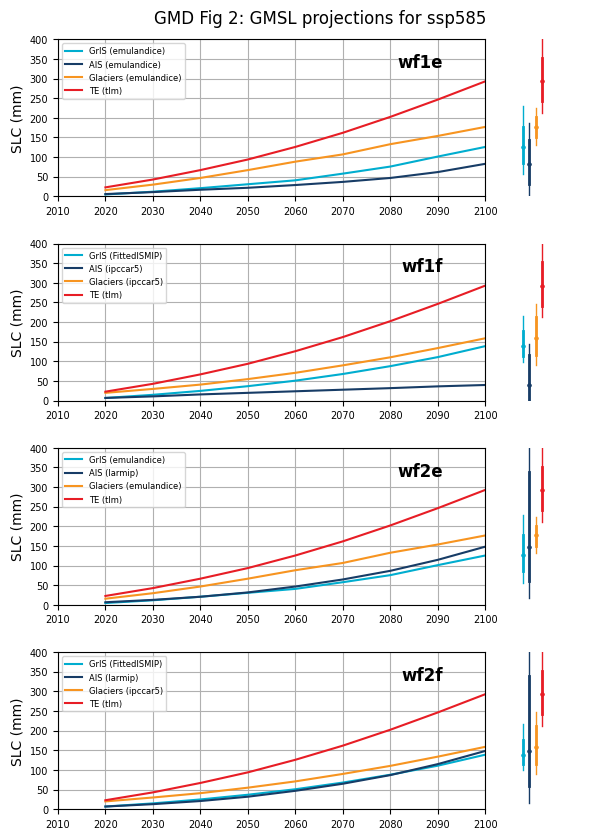

In [5]:
# Set global figure size and dots per inch
plt.rcParams.update({'figure.figsize':(7,10), 'figure.dpi':100})
# Initialize the grid
grid = plt.GridSpec(4, 5, wspace=0.4, hspace=0.3)
#
# Axis Spec.
xlim    = [2010,2100]
ylim    = [0 , 400]
xlim1   = [.1,2]
#
XAX1        = df_ptile.loc[:,"Year"].unique()
SSP         = df_ptile.loc[:,"SSP"].unique()
COMPONENT   = df_ptile.loc[:,"Component"].unique()
MODULE      = df_ptile.loc[:,"Module"].unique()
#
# Subplot Axis.
ax1_wf1e = plt.subplot(grid[0, :4]); ax2_wf1e = plt.subplot(grid[0, 4]);
ax1_wf1f = plt.subplot(grid[1, :4]); ax2_wf1f = plt.subplot(grid[1, 4]);
ax1_wf2e = plt.subplot(grid[2, :4]); ax2_wf2e = plt.subplot(grid[2, 4]);
ax1_wf2f = plt.subplot(grid[3, :4]); ax2_wf2f = plt.subplot(grid[3, 4]);
#
ss= "ssp585" #for ss in SSP: # Loop through each SSP
for ww in WORKFLO:
    # Select subplot axis based on workflow
    ax1 = eval(f'ax1_{ww}');    ax2 = eval(f'ax2_{ww}')
    # X axis for the Right (Bar) Plot.
    XAX2 = np.array([[.2,.2]]) 
    #
    # Plot Left 
    # Within a single sub-plot, Loop over individual WF components.
    for WFcomp in np.arange(len(eval(ww))):                 # Index of elements within each workflow (e.g. GrIS-emulandice)
        CoMpOnEnT   = (eval(ww)[WFcomp]).split('-')[0]      # e.g. GrIS
        MoDuLe      = (eval(ww)[WFcomp]).split('-')[1]      # e.g. emulandice
        Yax1        = df_ptile.loc[((df_ptile['SSP'] == ss) & (df_ptile["Component"] == CoMpOnEnT) & (df_ptile['Module'] == MoDuLe)),"col_50" ] #Glacier
        ax1.plot(XAX1, Yax1, label = f'{CoMpOnEnT} ({MoDuLe})', color = eval(f'color_{CoMpOnEnT}'))
        # Plot Right
        Yax2_1 = df_ptile.loc[((df_ptile['SSP'] == ss) & (df_ptile["Component"] == CoMpOnEnT) & (df_ptile['Module'] == MoDuLe) & (df_ptile['Year'] == 2100)),("col_5", "col_95") ].values
        Yax2_2 = df_ptile.loc[((df_ptile['SSP'] == ss) & (df_ptile["Component"] == CoMpOnEnT) & (df_ptile['Module'] == MoDuLe) & (df_ptile['Year'] == 2100)),("col_17", "col_83") ].values 
        Yax2_3 = df_ptile.loc[((df_ptile['SSP'] == ss) & (df_ptile["Component"] == CoMpOnEnT) & (df_ptile['Module'] == MoDuLe) & (df_ptile['Year'] == 2100)),("col_50","col_50") ].values 
        #
        ax2.plot(XAX2.transpose(), Yax2_1.transpose(), label = f'{CoMpOnEnT} ({MoDuLe})', color = eval(f'color_{CoMpOnEnT}'),linewidth=1)
        ax2.plot(XAX2.transpose(), Yax2_2.transpose(), label = f'{CoMpOnEnT} ({MoDuLe})', color = eval(f'color_{CoMpOnEnT}'),linewidth=2)
        ax2.plot(XAX2.transpose(), Yax2_3.transpose(), marker = 'o', color = eval(f'color_{CoMpOnEnT}'),ms = 2,mfc='none')
        XAX2 = XAX2+.15
        #
    ax1.tick_params(axis='both', labelsize=7)
    ax1.legend(loc='upper left',prop={'size': 6}); ax1.set_xlim(xlim); ax1.set_ylim(ylim)
    ax1.set_ylabel("SLC (mm)"); ax1.grid()
    ax1.text(.9, .91, ww, horizontalalignment='right',verticalalignment='top',weight='bold',fontsize=12,transform=ax1.transAxes)
    ax2.set_ylim(ylim); ax2.axis('off'); ax2.set_xlim(xlim1);
plt.suptitle('GMD Fig 2: GMSL projections for {one}'.format(one=ss),y=0.91)
# plt.supxlabel('common x label'); plt.supylabel('common y label')
plt.show()

In [6]:
# Workflows differ based on their handeling of the cryospheric components (Icesheets and glaciers) 
# They use common modules for projecting vertical land motion (kopp14/verticallandmotion), Sterodynamics and global mean thermal expansion (tlm/oceandynamics), and land water storage (ssp/landwaterstorage